## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 確認硬體資源
!nvidia-smi

Sat Mar 23 19:22:41 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.39       Driver Version: 418.39       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 106...  On   | 00000000:01:00.0  On |                  N/A |
| 25%   54C    P0    29W / 120W |    187MiB /  6077MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
import os
from tensorflow.python import keras

# Try to enable GPU (optional)


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理

def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y   

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
"""
Your code here
"""
def build_mlp(input_shape, output_units=10, num_neurons=[2048, 1024, 512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 2048)              6293504   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 1024)              2098176   
_________________________________________________________________
hidden_layer3 (Dense)        (None, 512)               524800    
_________________________________________________________________
hidden_layer4 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer5 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290  

In [7]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [8]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["acc"], optimizer=optimizer)

In [9]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 4s 85us/sample - loss: 2.0028 - acc: 0.2646 - val_loss: 1.7992 - val_acc: 0.3460
Epoch 2/100
50000/50000 [==============================] - 4s 76us/sample - loss: 1.7349 - acc: 0.3714 - val_loss: 1.6722 - val_acc: 0.3920
Epoch 3/100
50000/50000 [==============================] - 4s 77us/sample - loss: 1.6339 - acc: 0.4126 - val_loss: 1.6114 - val_acc: 0.4239
Epoch 4/100
50000/50000 [==============================] - 4s 76us/sample - loss: 1.5590 - acc: 0.4396 - val_loss: 1.5657 - val_acc: 0.4458
Epoch 5/100
50000/50000 [==============================] - 4s 77us/sample - loss: 1.5163 - acc: 0.4586 - val_loss: 1.5335 - val_acc: 0.4482
Epoch 6/100
50000/50000 [==============================] - 4s 76us/sample - loss: 1.4619 - acc: 0.4751 - val_loss: 1.4673 - val_acc: 0.4761
Epoch 7/100
50000/50000 [==============================] - 4s 76us/sample - loss: 1.4258 - acc: 0.4884 - val_l

Epoch 59/100
50000/50000 [==============================] - 4s 76us/sample - loss: 0.2023 - acc: 0.9288 - val_loss: 3.5102 - val_acc: 0.5040
Epoch 60/100
50000/50000 [==============================] - 4s 75us/sample - loss: 0.2039 - acc: 0.9299 - val_loss: 3.4014 - val_acc: 0.5031
Epoch 61/100
50000/50000 [==============================] - 4s 75us/sample - loss: 0.1875 - acc: 0.9344 - val_loss: 3.6643 - val_acc: 0.5040
Epoch 62/100
50000/50000 [==============================] - 4s 74us/sample - loss: 0.1737 - acc: 0.9392 - val_loss: 3.7307 - val_acc: 0.4986
Epoch 63/100
50000/50000 [==============================] - 4s 76us/sample - loss: 0.1589 - acc: 0.9451 - val_loss: 3.9327 - val_acc: 0.4975
Epoch 64/100
50000/50000 [==============================] - 4s 76us/sample - loss: 0.1688 - acc: 0.9412 - val_loss: 3.7286 - val_acc: 0.5085
Epoch 65/100
50000/50000 [==============================] - 4s 75us/sample - loss: 0.1454 - acc: 0.9511 - val_loss: 4.0142 - val_acc: 0.5110
Epoch 66/100


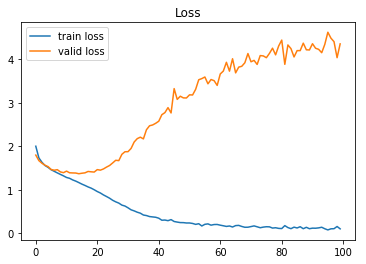

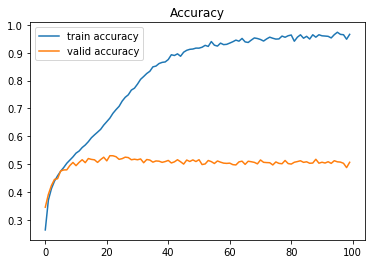

In [11]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()